In [64]:
import numpy as np
import pandas as pd

# data = pd.read_csv('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/Features/Overall/car_human_pillar_wall_overall.csv')
car_data = pd.read_csv('../../data/features/114KHz/car.csv')
human_data = pd.read_csv('../../data/features/114KHz/human.csv')
pillar_data = pd.read_csv('../../data/features/114KHz/pillar.csv')
wall_data = pd.read_csv('../../data/features/114KHz/wall.csv')
motorbike_data = pd.read_csv('../../data/features/114KHz/motorbike.csv')
cycle_data = pd.read_csv('../../data/features/114KHz/cycle.csv')

human = human_data.loc[human_data['type'] == 'HUMAN'].iloc[:,4:]
car = car_data.loc[car_data['type'] == 'CAR'].iloc[:,4:]
pillar = pillar_data.loc[pillar_data['type'] == 'PILLAR'].iloc[:,4:]
wall = wall_data.loc[wall_data['type'] == 'WALL'].iloc[:,4:]
motorbike = motorbike_data.loc[motorbike_data['type'] == 'MOTORBIKE'].iloc[:,4:]
cycle = cycle_data.loc[cycle_data['type'] == 'CYCLE'].iloc[:,4:]



In [65]:
human_label = ['HUMAN']*human.shape[0]
car_label = ['CAR']*car.shape[0]
wall_label = ['WALL']*wall.shape[0]
pillar_label = ['PILLAR']*pillar.shape[0]
non_human_label = ['NON_HUMAN']*(car.shape[0] +wall.shape[0] + pillar.shape[0])
human.shape, car.shape, pillar.shape, wall.shape

((10231, 90), (12080, 90), (9568, 90), (5067, 90))

In [83]:
from sklearn import preprocessing
def custom_normalization(X_set):
    new_X_set = []
    for X in X_set:
        min = np.min(X)
        max = np.max(X)
        value = max - min
        data_set = []
        for data in X:
           data_set.append(((data - min) / value) + 0)
        new_X_set.append(data_set)
    return new_X_set

In [91]:
y = human_label + non_human_label
from sklearn.model_selection import train_test_split

data = human.values.tolist() + car.values.tolist() + wall.values.tolist() + pillar.values.tolist()
X_normalized = custom_normalization(data)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, label, test_size=0.4, random_state=42)

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

def create_confusion_matrix(y_test, result, labels = ['HUMAN', 'NON_HUMAN']):
    cm = confusion_matrix(y_test, result)
    import seaborn as sns
    import matplotlib.pyplot as plt     
    sum = np.sum(cm, axis=1)
    score = accuracy_score(y_test, result)
    print(score)
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision_CLASS_A = round(precision_score(y_test, result, average='binary',pos_label=labels[0]),2)
    precision_CLASS_B = round(precision_score(y_test, result, average='binary',pos_label=labels[1]),2)
    recall_CLASS_A = round(recall_score(y_test, result, average='binary',pos_label=labels[0]),2)
    recall_CLASS_B = round(recall_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_CLASS_A = round(f1_score(y_test, result, average='binary',pos_label=labels[0]),2)
    f1_CLASS_B = round(f1_score(y_test, result, average='binary',pos_label=labels[1]),2)
    f1_average = round((f1_CLASS_A + f1_CLASS_B)/2, 2);
    print('Precision: Class A',precision_CLASS_A)
    print('Precision: Class B',precision_CLASS_B)
    print('Recall: Class A',recall_CLASS_A)
    print('Recall: Class B',recall_CLASS_B)
    print('F1-Score: Class A',f1_CLASS_A)
    print('F1-Score: Class B',f1_CLASS_B)
    print('Average F1-score:', f1_average)
        
    cm_new = np.append(cm[0], recall_CLASS_A)
    cm_new2 = np.append(cm[1], recall_CLASS_B)
    cm_new3 = np.array([precision_CLASS_A, precision_CLASS_B, score])
    cm = np.array([cm_new,cm_new2,cm_new3])
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Reds"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Multilayer Perceptron'); 
    counter = 0
    for i in range(0,2):
        for j in range(0,3):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 2:
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels);

Iteration 1, loss = 0.74473345
Iteration 2, loss = 0.63030314
Iteration 3, loss = 0.60335005
Iteration 4, loss = 0.58840015
Iteration 5, loss = 0.58071643
Iteration 6, loss = 0.57691719
Iteration 7, loss = 0.57460723
Iteration 8, loss = 0.57265441
Iteration 9, loss = 0.57070007
Iteration 10, loss = 0.56884876
Iteration 11, loss = 0.56661935
Iteration 12, loss = 0.56233181
Iteration 13, loss = 0.55795526
Iteration 14, loss = 0.55475622
Iteration 15, loss = 0.55174773
Iteration 16, loss = 0.54868459
Iteration 17, loss = 0.54549781
Iteration 18, loss = 0.54215044
Iteration 19, loss = 0.53877208
Iteration 20, loss = 0.53523035
Iteration 21, loss = 0.53160024
Iteration 22, loss = 0.52780958
Iteration 23, loss = 0.52393990
Iteration 24, loss = 0.51997203
Iteration 25, loss = 0.51586130
Iteration 26, loss = 0.51175240
Iteration 27, loss = 0.50751178
Iteration 28, loss = 0.50317634
Iteration 29, loss = 0.49890048
Iteration 30, loss = 0.49458095
Iteration 31, loss = 0.49025948
Iteration 32, los

Iteration 253, loss = 0.34434310
Iteration 254, loss = 0.34435096
Iteration 255, loss = 0.34406153
Iteration 256, loss = 0.34388789
Iteration 257, loss = 0.34357196
Iteration 258, loss = 0.34358871
Iteration 259, loss = 0.34338748
Iteration 260, loss = 0.34326641
Iteration 261, loss = 0.34319252
Iteration 262, loss = 0.34296142
Iteration 263, loss = 0.34286405
Iteration 264, loss = 0.34274685
Iteration 265, loss = 0.34256726
Iteration 266, loss = 0.34245527
Iteration 267, loss = 0.34233333
Iteration 268, loss = 0.34218643
Iteration 269, loss = 0.34211210
Iteration 270, loss = 0.34194641
Iteration 271, loss = 0.34184808
Iteration 272, loss = 0.34175666
Iteration 273, loss = 0.34160728
Iteration 274, loss = 0.34155050
Iteration 275, loss = 0.34132620
Iteration 276, loss = 0.34109975
Iteration 277, loss = 0.34106100
Iteration 278, loss = 0.34091701
Iteration 279, loss = 0.34067276
Iteration 280, loss = 0.34069264
Iteration 281, loss = 0.34044068
Iteration 282, loss = 0.34048505
Iteration 

Iteration 505, loss = 0.31782348
Iteration 506, loss = 0.31781737
Iteration 507, loss = 0.31757507
Iteration 508, loss = 0.31765598
Iteration 509, loss = 0.31752269
Iteration 510, loss = 0.31739132
Iteration 511, loss = 0.31733188
Iteration 512, loss = 0.31734918
Iteration 513, loss = 0.31711163
Iteration 514, loss = 0.31698334
Iteration 515, loss = 0.31708264
Iteration 516, loss = 0.31680146
Iteration 517, loss = 0.31673462
Iteration 518, loss = 0.31672067
Iteration 519, loss = 0.31664466
Iteration 520, loss = 0.31642972
Iteration 521, loss = 0.31650935
Iteration 522, loss = 0.31643403
Iteration 523, loss = 0.31628770
Iteration 524, loss = 0.31605694
Iteration 525, loss = 0.31593239
Iteration 526, loss = 0.31589676
Iteration 527, loss = 0.31592974
Iteration 528, loss = 0.31576035
Iteration 529, loss = 0.31561472
Iteration 530, loss = 0.31571037
Iteration 531, loss = 0.31547040
Iteration 532, loss = 0.31527773
Iteration 533, loss = 0.31522106
Iteration 534, loss = 0.31530102
Iteration 

Iteration 754, loss = 0.29700371
Iteration 755, loss = 0.29681483
Iteration 756, loss = 0.29661844
Iteration 757, loss = 0.29668550
Iteration 758, loss = 0.29675032
Iteration 759, loss = 0.29653593
Iteration 760, loss = 0.29642167
Iteration 761, loss = 0.29637460
Iteration 762, loss = 0.29643078
Iteration 763, loss = 0.29619640
Iteration 764, loss = 0.29616594
Iteration 765, loss = 0.29612347
Iteration 766, loss = 0.29611742
Iteration 767, loss = 0.29612429
Iteration 768, loss = 0.29605529
Iteration 769, loss = 0.29574772
Iteration 770, loss = 0.29583625
Iteration 771, loss = 0.29603240
Iteration 772, loss = 0.29580742
Iteration 773, loss = 0.29570243
Iteration 774, loss = 0.29551710
Iteration 775, loss = 0.29538823
Iteration 776, loss = 0.29561968
Iteration 777, loss = 0.29543038
Iteration 778, loss = 0.29512156
Iteration 779, loss = 0.29551612
Iteration 780, loss = 0.29501093
Iteration 781, loss = 0.29523136
Iteration 782, loss = 0.29526747
Iteration 783, loss = 0.29485417
Iteration 

/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8745517288043846
Precision: Class A 0.82
Precision: Class B 0.89
Recall: Class A 0.71
Recall: Class B 0.94
F1-Score: Class A 0.76
F1-Score: Class B 0.92
Average F1-score: 0.84


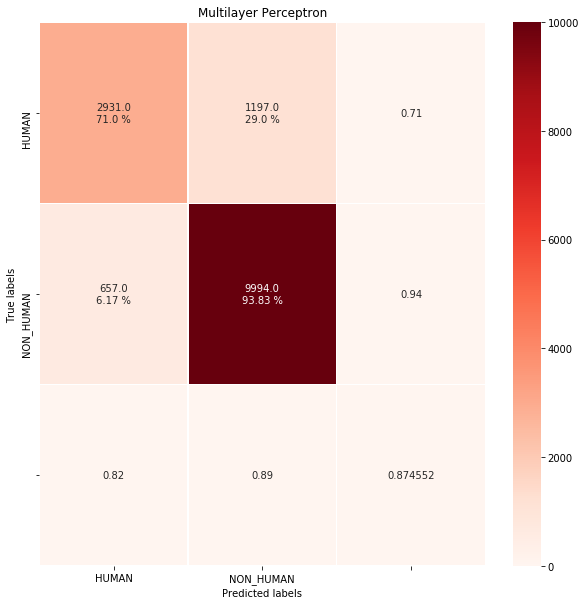

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(10), max_iter=1000, verbose=True)
clf.fit(normalized_X_Human_Non_Human_train, y_train)
result = clf.predict(normalized_X_Human_Non_Human_test)
create_confusion_matrix(y_test, result)

In [92]:
for i in range(10,90):
    clf = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(i), random_state=12)
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    print("hidden layer", i, "score average", scores.mean())

/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 10 score average 0.8337620000905929


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 11 score average 0.8331302780103437


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 12 score average 0.8335814112583817


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 13 score average 0.8342580867125206


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 14 score average 0.8361528378123054


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 15 score average 0.834664236072534


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


hidden layer 16 score average 0.826136821190306


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 17 score average 0.7970004642935242


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 18 score average 0.8380024401816358


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 19 score average 0.8358370591867855


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 20 score average 0.8348896866850016


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 21 score average 0.8332204716736178


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 22 score average 0.8337618718799978


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


hidden layer 23 score average 0.8346190018644934


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


hidden layer 24 score average 0.7953664097802635


/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

0.9408760253830676
Precision: Class A 0.94
Precision: Class B 0.94
Recall: Class A 0.89
Recall: Class B 0.97
F1-Score: Class A 0.91
F1-Score: Class B 0.95
Average F1-score: 0.93


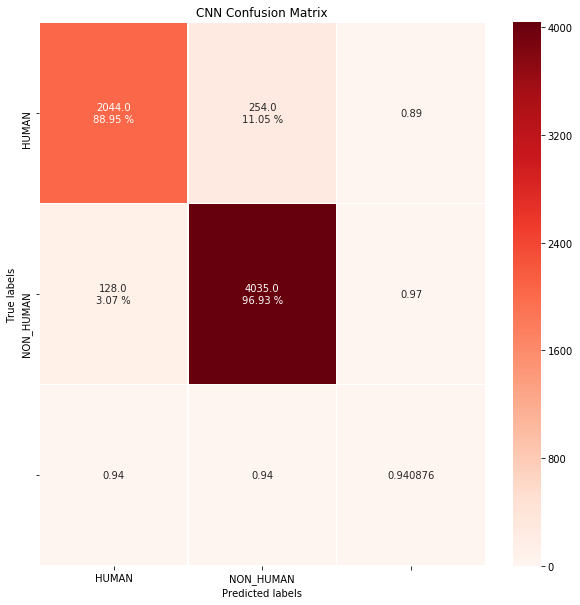

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15), random_state=12)
clf.fit(normalized_X_Human_Non_Human_train, y_train)
result = clf.predict(normalized_X_Human_Non_Human_test)
create_confusion_matrix(y_test, result)

In [ ]:
hidden_layer_sizes = []
for i in range(5,90):
    hidden_layer_sizes.append(i)
param_grid = [
        {
            'activation' : ['tanh'],
            'solver' : ['lbfgs','sgd'],
            'hidden_layer_sizes': hidden_layer_sizes,
        }
       ]

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(MLPClassifier(max_iter=1000, warm_start=True), param_grid, cv=3,scoring='accuracy',n_jobs=-1)
clf.fit(X_normalized,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/anujjoshi/miniconda3/envs/uni_project/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/anujjoshi